# 1. Setup Mario

In [1]:
%pip install gym_super_mario_bros==7.3.0 nes_py

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [7]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [4]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000):
    if done:
        # Start the game
        env.reset()
    # Do random actions
    state, reward, done, info, _ = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Closes the game
env.close()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


ValueError: not enough values to unpack (expected 5, got 4)

# 2. Preprocess Environment

In [8]:
# Install pytorch
# MPS acceleration is available on MacOS 12.3+
%pip install torch torchvision torchaudio

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Install stable baselines for RL stuff
# Latest version of stable-baskeline3 does not support openAI gym
%pip install stable-baselines3==1.5.0
%pip install setuptools==65.5.0 pip==21
%pip install wheel==0.38.0

  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import Frame Stacker Wrapper and Grayscalling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
# Stable-Baselines3 is a bunch of different algorithms to train your ai model
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import MatplotLib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [11]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [12]:
state = env.reset()
state.shape

(1, 240, 256, 4)

In [13]:
state, reward, done, info = env.step([env.action_space.sample()])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


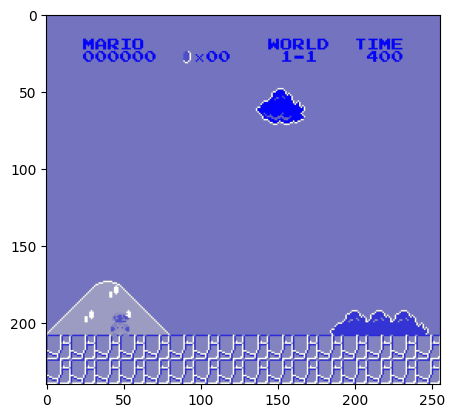

In [14]:
plt.imshow(state[0])

# 3. Train the RL Model

# 4. Test it Out